<a href="https://colab.research.google.com/github/Ankit4371/Projects/blob/master/Machine%20Learning/Convolutional%20Neural%20Network%20Model/Which_number_is_this%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Which Number is this?

It is made using [Convolutional Neural Networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) 

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

Parameters and Hyperparameters.

In [5]:

img_rows, img_cols = 28, 28 
batch_size = 12
num_classes = 10
epochs = 20
dropout = 0.5

### Loading data



In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
orig_test = x_test

11493376/11490434 [==============================] - 0s 0us/step


The following cell displays random test images to get an idea of what they look like.

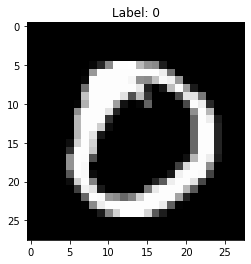

In [7]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title('Label: %d' % y_test[index])
plt.show()

### Data Preparation



In [9]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


## Defining Model


In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

### Training Model


Epoch 1/20
5000/5000 [==============================] - 26s 5ms/step - loss: 0.1771 - accuracy: 0.9465 - val_loss: 0.0462 - val_accuracy: 0.9847
Epoch 2/20
5000/5000 [==============================] - 26s 5ms/step - loss: 0.0805 - accuracy: 0.9764 - val_loss: 0.0344 - val_accuracy: 0.9888
Epoch 3/20
5000/5000 [==============================] - 27s 5ms/step - loss: 0.0615 - accuracy: 0.9813 - val_loss: 0.0332 - val_accuracy: 0.9888
Epoch 4/20
5000/5000 [==============================] - 25s 5ms/step - loss: 0.0501 - accuracy: 0.9853 - val_loss: 0.0305 - val_accuracy: 0.9909
Epoch 5/20
5000/5000 [==============================] - 25s 5ms/step - loss: 0.0438 - accuracy: 0.9868 - val_loss: 0.0290 - val_accuracy: 0.9906
Epoch 6/20
5000/5000 [==============================] - 25s 5ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0289 - val_accuracy: 0.9914
Epoch 7/20
5000/5000 [==============================] - 25s 5ms/step - loss: 0.0344 - accuracy: 0.9895 - val_loss: 0.0303 - val_ac

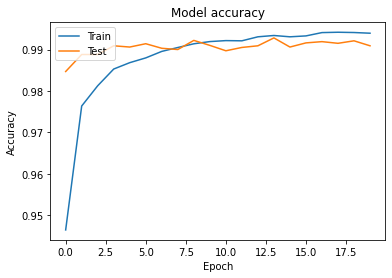

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Making Predictions

In [14]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

The following cell chooses a random test image, prints the model predicted value, expected value (label), and the original image.

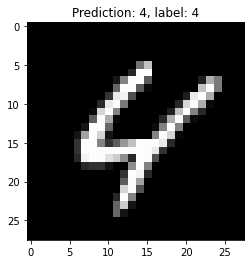

In [15]:
index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

## Error Analysis

The next cell looks for model predictions that specifically do not match the expected value. In some cases, even humans might disagree on what this image is.

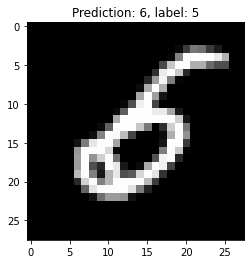

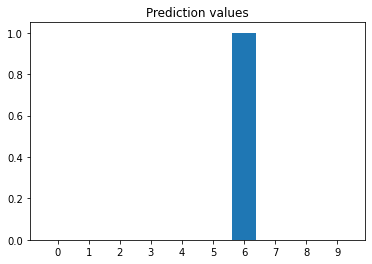

In [18]:
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()